# Tarea #1 Inteligencia Artificial: Implementación de Regresión Lineal Manual con Descenso de Gradiente.
## Profesor:
- Steven Andrey Pacheco Portuguez

## Estudiantes:
- Javier Alonso Rojas Rojas
- Dario Espinoza
- Emmanuel Sanchez


## Lectura del dataset

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('Student_Performance.csv')
# Ver las filas y columnas del DataFrame
print(df.shape)

# Ver las columnas y tipos de datos del DataFrame
print(df.info())

# Ver características estadísticas descriptivas básicas del DataFrame
print(df.describe())
print(df.describe(include='all'))

# Valores duplicados
print(f"Duplicados: {df.duplicated().sum() | 0}")
# Valores nulos
print(f"Nulos:\n {df.isna().sum() | 0}")
df

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Tratamiento de duplicados

In [3]:
df = df.drop_duplicates()

# Confirmar que se borraron
print(f"Duplicados: {df.duplicated().sum()}")  
print(f"Forma: {df.shape}")               


Duplicados: 0
Forma: (9873, 6)


# Codificación numérica para la columna categórica

In [4]:
if df["Extracurricular Activities"].dtype == "O":
    df["Extracurricular Activities"] = (
        df["Extracurricular Activities"].map({"Yes": 1, "No": 0}).astype("int64")
    )

/tmp/ipykernel_6593/3770468988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Extracurricular Activities"] = (


## Histogramas

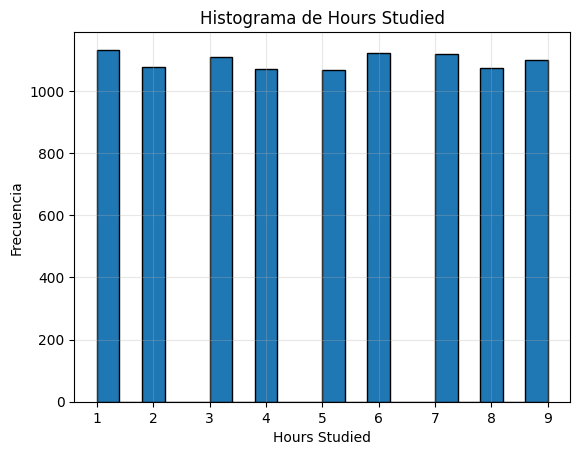

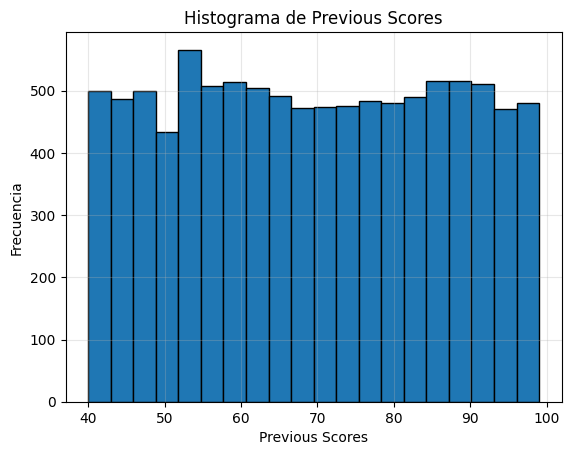

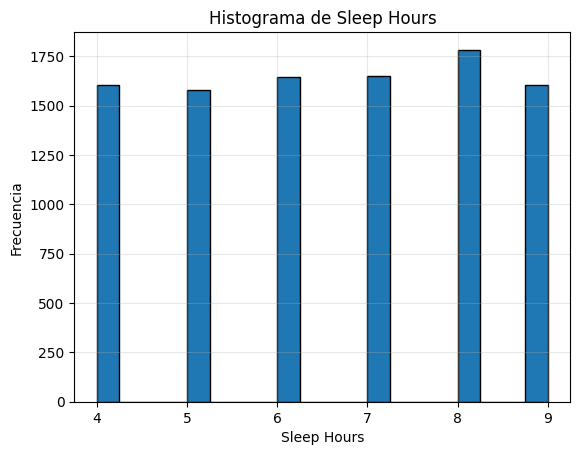

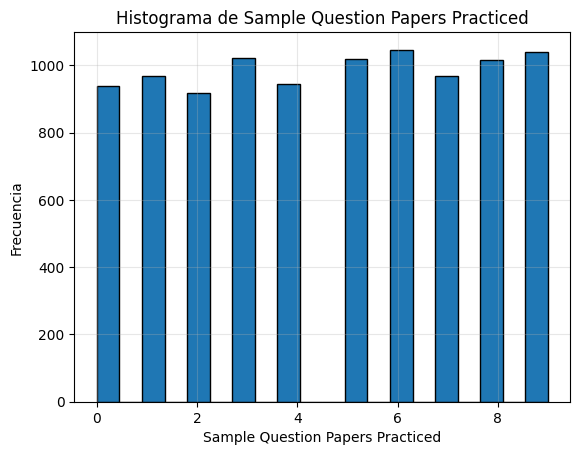

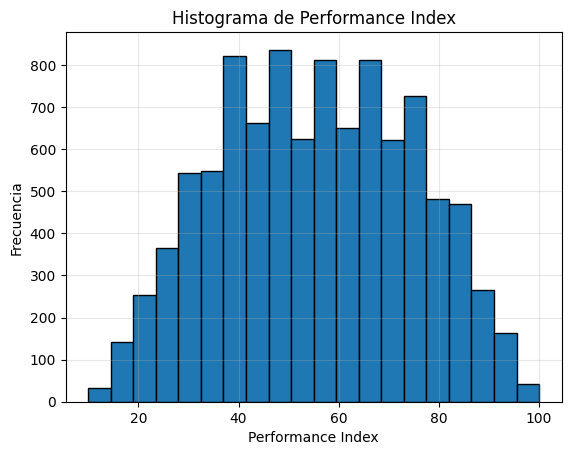

In [5]:
num_vars = ["Hours Studied", "Previous Scores", "Sleep Hours",
            "Sample Question Papers Practiced", "Performance Index"]
for col in num_vars:
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()


## Boxplots

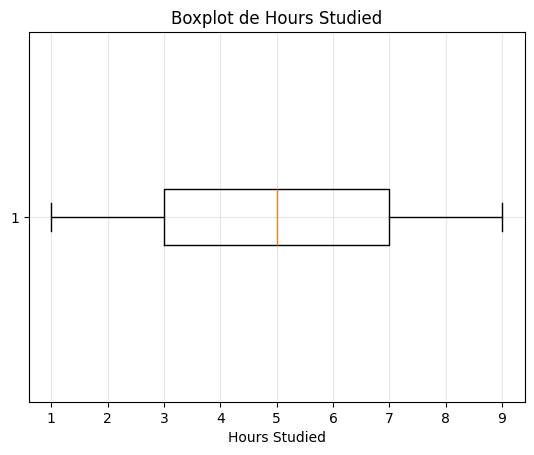

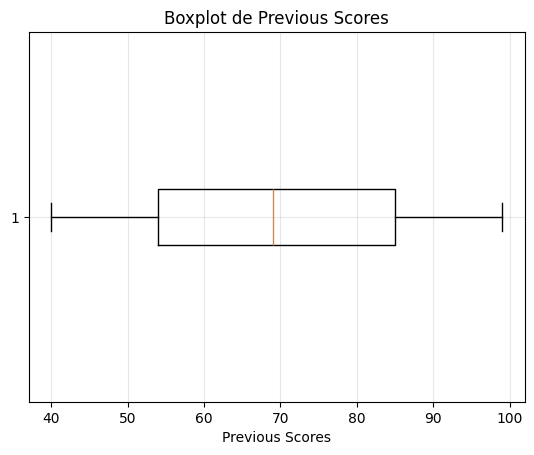

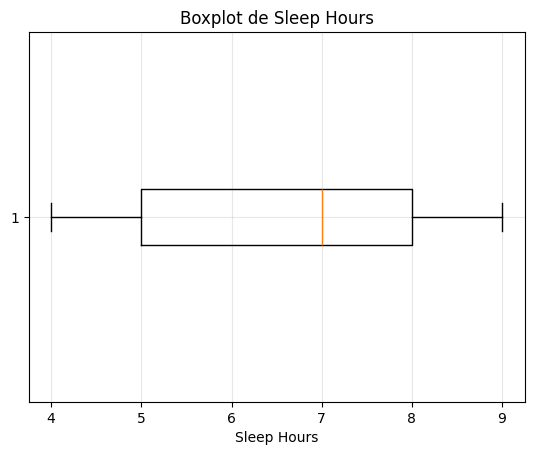

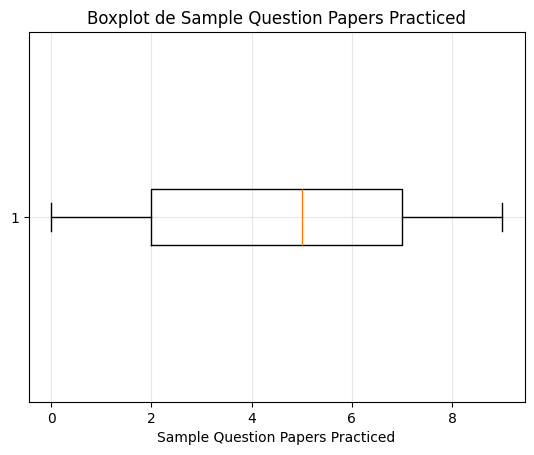

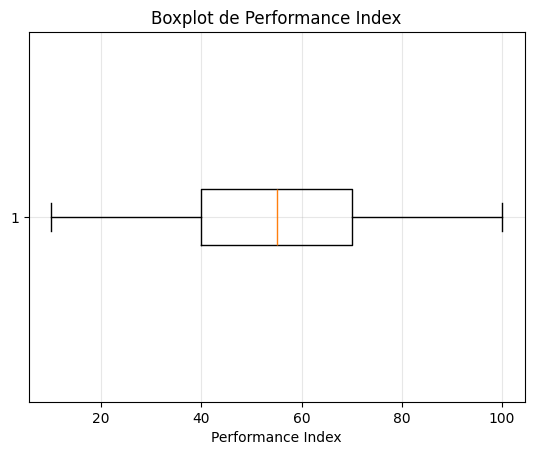

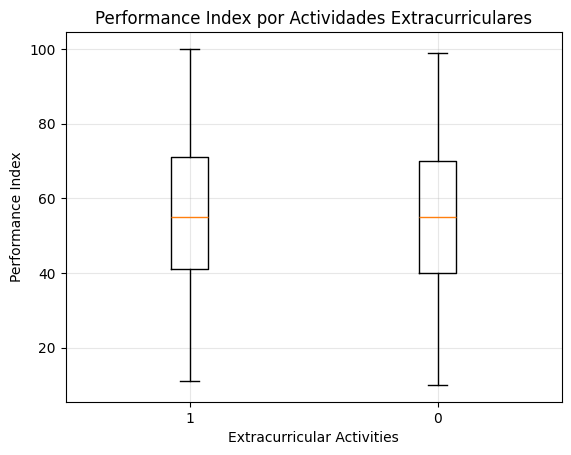

In [6]:
# 2. Boxplots
for col in num_vars:
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(alpha=0.3)
    plt.show()


# Boxplot del Performance Index por categoría de actividades extracurriculares
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat]["Performance Index"] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title("Performance Index por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.grid(alpha=0.3)
plt.show()


## Scatter Plots contra el Performance Index

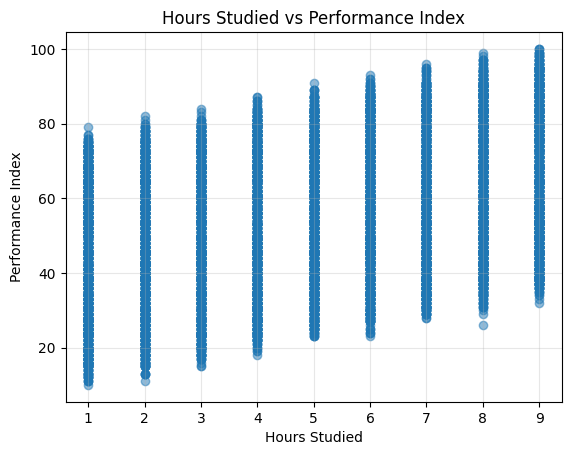

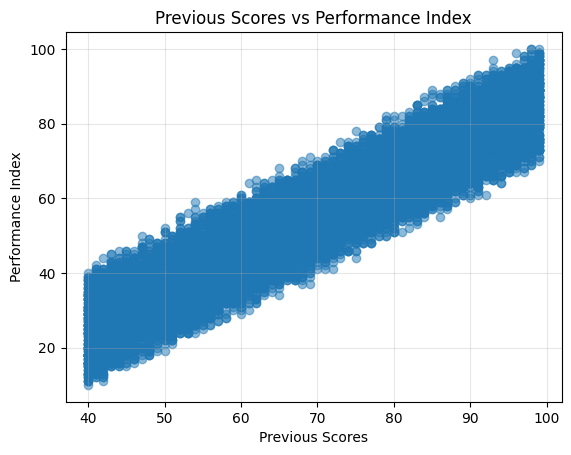

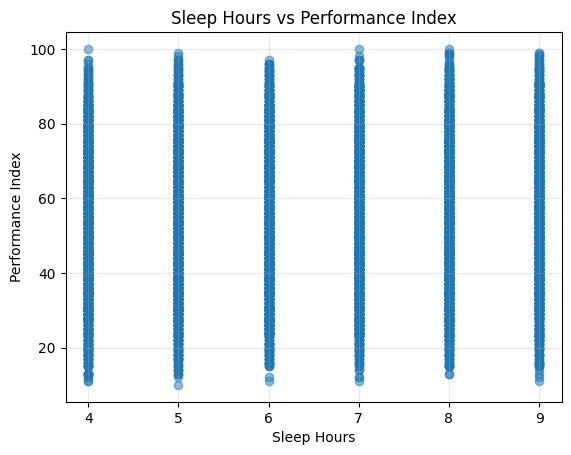

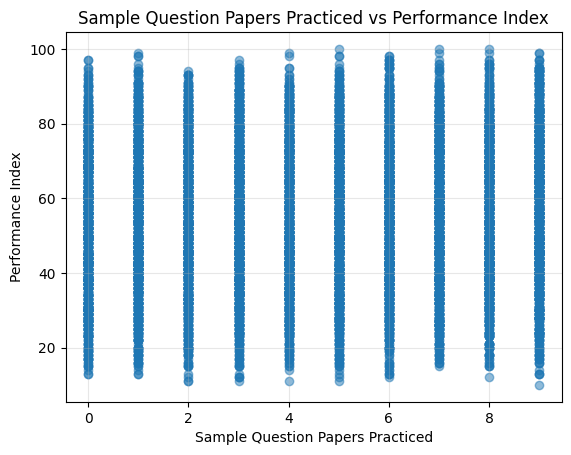

In [7]:
target = "Performance Index"
for col in num_vars:
    if col != target:
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(alpha=0.3)
        plt.show()

## Heatmap de correlacion

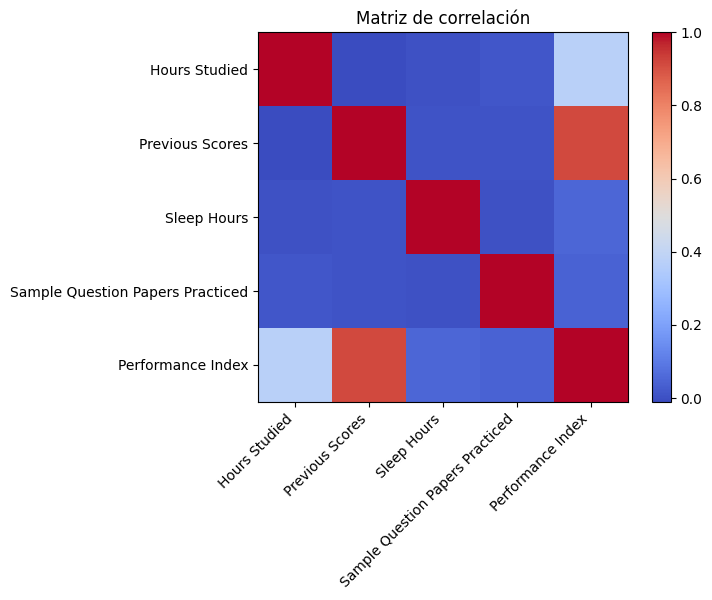

In [8]:
corr = df[num_vars].corr()

fig, ax = plt.subplots()
cax = ax.imshow(corr, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

# Poner etiquetas en ejes
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

plt.title("Matriz de correlación")
plt.show()

## Grafico de barras para variable categorica

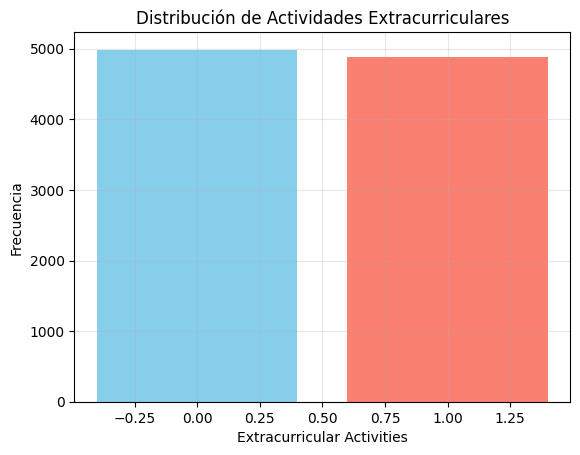

In [9]:
cat_counts = df["Extracurricular Activities"].value_counts()

plt.bar(cat_counts.index, cat_counts.values, color=['skyblue', 'salmon'])
plt.title("Distribución de Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

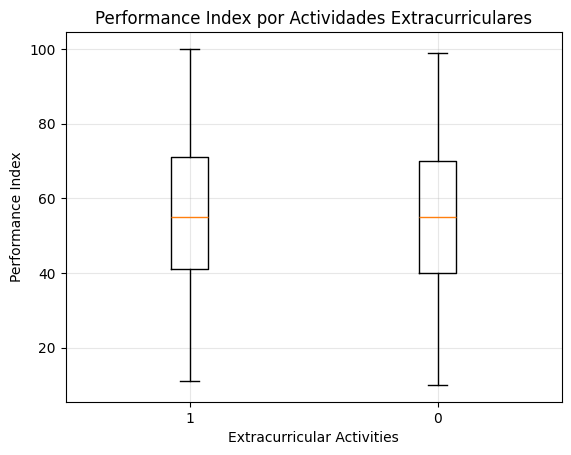

In [10]:
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat][target] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title(f"{target} por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel(target)
plt.grid(alpha=0.3)
plt.show()

## Split de Dataset

### Split random

In [11]:
# Transformas los datos a numericos, no nos preocupa trabajar con una copia, ya que tenemos el dataset original
"""
df["Extracurricular Activities"] = (
    df["Extracurricular Activities"].map({'Yes' : 1, 'No' : 0}).astype('int64')
)
"""
df["Extracurricular Activities"]

# Definimos nuestros features 'X' y  target `y` = 'Performance Index'
FEATURE_COLS = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities", 
    "Sleep Hours",
    "Sample Question Papers Practiced",
]

TARGET_COL = "Performance Index"

def define_x_y(df: pandas.DataFrame):
    """
    Separamos el DataFrame en X (features) y Y (Target) con el orden acordado
    """

    X = df[FEATURE_COLS].copy()
    Y = df[TARGET_COL].copy()

    return X, Y

X, Y = define_x_y(df)

# Creamos una lista de indices que vamos a permutar y hacer cortes
idx = df.index
idx

# Constante, se eligio aleatoriamente (puede ser fechada)
# Muestreo aleatorio
SEED = 42

perm = np.random.default_rng(SEED).permutation(idx)
perm
n = perm.shape[0]

val_n = int(n * 0.15) #Corte para validacion 
test_n = int(n * 0.15) #Corte para testing
train_n = n - val_n - test_n #Restante para training

train_idx = perm[:train_n]
val_idx   = perm[train_n:train_n + val_n]
test_idx  = perm[train_n + val_n:]

# Aplicamos a X y Y el mismo indicie para ambos
X_train, X_val, X_test = X.loc[train_idx], X.loc[val_idx], X.loc[test_idx]
y_train, y_val, y_test = Y.loc[train_idx], Y.loc[val_idx], Y.loc[test_idx]


### Split estratificado

In [12]:
# 1. Binear por cuartiles
def bin_performance_index(y: pandas.Series, n_bins: int = 5):
    bins = pandas.cut(y, n_bins, labels=False, duplicates='drop')
    return bins 

# 2. Split estratificado
def stratified_split(y_bins: pandas.Series, rng: np.random.Generator, val_ratio : float = 0.15, test_ratio : float = 0.15):
    """
    Parte los indices manteniendo proporciones por cada bin
    """
    train_idx, val_idx, test_idx = [], [], []

    valid = y_bins.dropna()
    unique_bins = np.sort(valid.unique())

    for b in unique_bins:
        idx_b = valid.index[valid == b].to_numpy()
        perm_b = rng.permutation(idx_b)
        n_b = len(perm_b)
        val_n_b = int(n_b * val_ratio)
        test_n_b = int(n_b * test_ratio)
        train_n_b = n_b - val_n_b - test_n_b

        train_idx.append(perm_b[:train_n_b])
        val_idx.append(perm_b[train_n_b: train_n_b+val_n_b])
        test_idx.append(perm_b[train_n_b + val_n_b:])

    train_idx = np.concatenate(train_idx) if train_idx else np.array([], dtype=object)
    val_idx   = np.concatenate(val_idx)   if val_idx   else np.array([], dtype=object)
    test_idx  = np.concatenate(test_idx)  if test_idx  else np.array([], dtype=object)

    return train_idx, val_idx, test_idx

# 3. Pipeline estratificado 
def stratified_pipeline(df: pandas.DataFrame, n_bins = 5):
    rng = np.random.default_rng(SEED)

    # 1) X,y
    X, Y = define_x_y(df)

    # 2) Bins por cuantiles sobre y (para estratificar)
    y_bins = bin_performance_index(Y, n_bins=n_bins)

    # 3) Splits por estrato
    train_idx, val_idx, test_idx = stratified_split(y_bins, rng)

    X_train, X_val, X_test = X.loc[train_idx], X.loc[val_idx], X.loc[test_idx]
    y_train, y_val, y_test = Y.loc[train_idx], Y.loc[val_idx], Y.loc[test_idx]

    info_bins = (
        pandas.DataFrame({"bin": y_bins})
          .assign(split=lambda s:
                  np.where(s.index.isin(train_idx), "train",
                  np.where(s.index.isin(val_idx),   "val",
                  np.where(s.index.isin(test_idx),  "test", "none"))))
          .groupby(["split", "bin"]).size().unstack(0).fillna(0).astype(int)
    )

    return (X_train, y_train), (X_val, y_val), (X_test, y_test), info_bins

# Usamos el pipeline
(train, val, test, info_bins) = stratified_pipeline(df)
(X_train_stratified, y_train_stratified), (X_val_stratified, y_val_stratified), (X_test_stratified, y_test_stratified) = train, val, test

print(info_bins)


split  test  train  val
bin                    
0       133    627  133
1       396   1851  396
2       437   2043  437
3       389   1820  389
4       123    576  123


In [13]:
# Verificacion del proceso de spliting
def split_report(X, train_idx, val_idx, test_idx, train_ratio = 0.7, val_ratio = 0.15, test_ratio = 0.15):
    n = len(X)
    n_tr, n_va, n_te = len(train_idx), len(val_idx), len(test_idx)
    ratios = {
        "train" : (n_tr, n_tr / n),
        "val": (n_va, n_va / n),
        "test" : (n_te, n_te / n)
    }

    s_tr, s_va, s_te = set(train_idx), set(val_idx), set(test_idx)
    disjoint = s_tr.isdisjoint(s_va) and s_tr.isdisjoint(s_te) and s_va.isdisjoint(s_te)

    covered_all = (n_tr + n_va + n_te == n)
    return {
        "n_total": n,
        "ratios": ratios,
        "expected": {"train": train_ratio, "val": val_ratio, "test": test_ratio},
        "disjoint": disjoint,
        "covered_all": covered_all,
    }


sizes = split_report(X, train_idx, val_idx, test_idx)
print("= Split sizes =")
print("Total:", sizes["n_total"])
for part, (n, r) in sizes["ratios"].items():
    print(f"{part:>5}: {n}  ({r:.3f})  vs esperado {sizes['expected'][part]:.2f}")
print("Disjoint:", sizes["disjoint"], " Covered all:", sizes["covered_all"])

= Split sizes =
Total: 9873
train: 6913  (0.700)  vs esperado 0.70
  val: 1480  (0.150)  vs esperado 0.15
 test: 1480  (0.150)  vs esperado 0.15
Disjoint: True  Covered all: True


In [14]:
print("=== Split Random ===")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val  :", X_val.shape,   "y_val  :", y_val.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

print("\n=== Split Estratificado ===")
print("X_train_stratified:", X_train_stratified.shape, "y_train_stratified:", y_train_stratified.shape)
print("X_val_stratified  :", X_val_stratified.shape,   "y_val_stratified  :", y_val_stratified.shape)
print("X_test_stratified :", X_test_stratified.shape,  "y_test_stratified :", y_test_stratified.shape)

print("\nDistribución de bins en splits estratificados:")
print(info_bins)

=== Split Random ===
X_train: (6913, 5) y_train: (6913,)
X_val  : (1480, 5) y_val  : (1480,)
X_test : (1480, 5) y_test : (1480,)

=== Split Estratificado ===
X_train_stratified: (6917, 5) y_train_stratified: (6917,)
X_val_stratified  : (1478, 5) y_val_stratified  : (1478,)
X_test_stratified : (1478, 5) y_test_stratified : (1478,)

Distribución de bins en splits estratificados:
split  test  train  val
bin                    
0       133    627  133
1       396   1851  396
2       437   2043  437
3       389   1820  389
4       123    576  123


# Implementación de la Regresión Lineal y Evaluación de Modelo

Epoch    1 | train_mse=365.871136 | val_mse=365.105211
Epoch  200 | train_mse=167.621569 | val_mse=167.274468
Epoch  400 | train_mse=77.757431 | val_mse=77.582053
Epoch  600 | train_mse=37.304709 | val_mse=37.207038
Epoch  800 | train_mse=19.088730 | val_mse=19.031766
Epoch 1000 | train_mse=10.883349 | val_mse=10.850891
Epoch 1200 | train_mse=7.186051 | val_mse=7.169771
Epoch 1400 | train_mse=5.519541 | val_mse=5.514422
Epoch 1600 | train_mse=4.768149 | val_mse=4.770833
Epoch 1800 | train_mse=4.429259 | val_mse=4.437395
Epoch 2000 | train_mse=4.276367 | val_mse=4.288288
Epoch 2200 | train_mse=4.207370 | val_mse=4.221898
Epoch 2400 | train_mse=4.176223 | val_mse=4.192537
Epoch 2600 | train_mse=4.162158 | val_mse=4.179687
Epoch 2800 | train_mse=4.155806 | val_mse=4.174158
Epoch 3000 | train_mse=4.152936 | val_mse=4.171844

=== Random | BATCH (sin bias en X) ===
Train  MSE: 4.152936 | R2: 0.988694
Val    MSE: 4.171844   | R2: 0.988618
Test   MSE: 4.299104  | R2: 0.988651

Intercepto (b): 

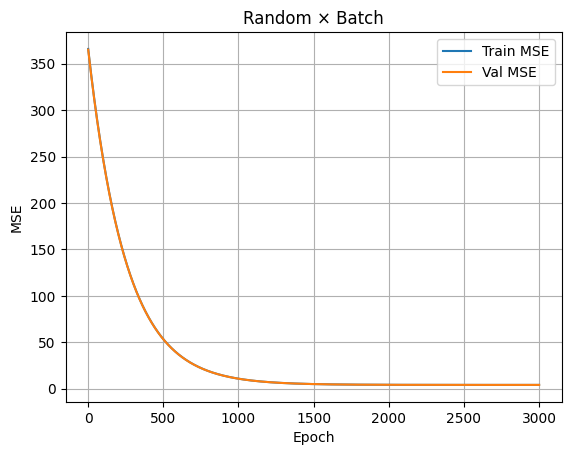

[MB] Epoch    1 | train_mse=295.212261 | val_mse=294.623509
[MB] Epoch  200 | train_mse=4.151052 | val_mse=4.172038
[MB] Epoch  400 | train_mse=4.150654 | val_mse=4.170832
[MB] Epoch  600 | train_mse=4.150642 | val_mse=4.170950
[MB] Epoch  800 | train_mse=4.150707 | val_mse=4.171816
[MB] Epoch 1000 | train_mse=4.150700 | val_mse=4.171030
[MB] Epoch 1200 | train_mse=4.150746 | val_mse=4.171581
[MB] Epoch 1400 | train_mse=4.150643 | val_mse=4.170423
[MB] Epoch 1600 | train_mse=4.150790 | val_mse=4.171325
[MB] Epoch 1800 | train_mse=4.150637 | val_mse=4.169987
[MB] Epoch 2000 | train_mse=4.150606 | val_mse=4.171112
[MB] Epoch 2200 | train_mse=4.150824 | val_mse=4.170986
[MB] Epoch 2400 | train_mse=4.150739 | val_mse=4.169678
[MB] Epoch 2600 | train_mse=4.150816 | val_mse=4.172037
[MB] Epoch 2800 | train_mse=4.150609 | val_mse=4.170243
[MB] Epoch 3000 | train_mse=4.150663 | val_mse=4.170458

=== Random | MINIBATCH (sin bias en X) ===
Train  MSE: 4.150663 | R2: 0.988700
Val    MSE: 4.170458

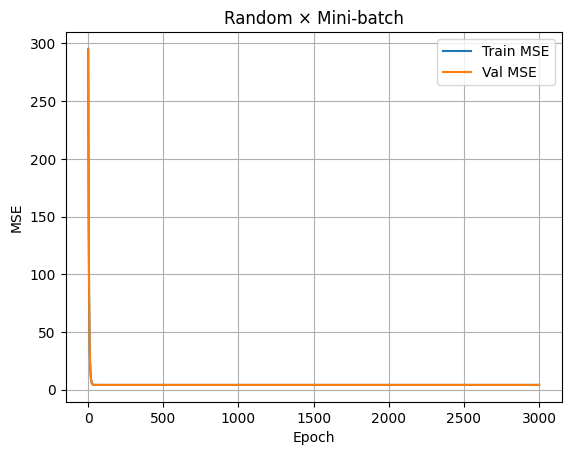

Epoch    1 | train_mse=365.091176 | val_mse=368.437452
Epoch  200 | train_mse=168.137742 | val_mse=170.193015
Epoch  400 | train_mse=78.399761 | val_mse=79.714011
Epoch  600 | train_mse=37.792587 | val_mse=38.674428
Epoch  800 | train_mse=19.410677 | val_mse=20.034240
Epoch 1000 | train_mse=11.086590 | val_mse=11.552466
Epoch 1200 | train_mse=7.315756 | val_mse=7.683477
Epoch 1400 | train_mse=5.606961 | val_mse=5.912581
Epoch 1600 | train_mse=4.832337 | val_mse=5.098151
Epoch 1800 | train_mse=4.481070 | val_mse=4.721107
Epoch 2000 | train_mse=4.321730 | val_mse=4.544947
Epoch 2200 | train_mse=4.249427 | val_mse=4.461606
Epoch 2400 | train_mse=4.216609 | val_mse=4.421513
Epoch 2600 | train_mse=4.201708 | val_mse=4.401804
Epoch 2800 | train_mse=4.194940 | val_mse=4.391852
Epoch 3000 | train_mse=4.191866 | val_mse=4.386666

=== Stratified | BATCH (sin bias en X) ===
Train  MSE: 4.191866 | R2: 0.988563
Val    MSE: 4.386666   | R2: 0.988139
Test   MSE: 3.923578  | R2: 0.989654

Intercepto (

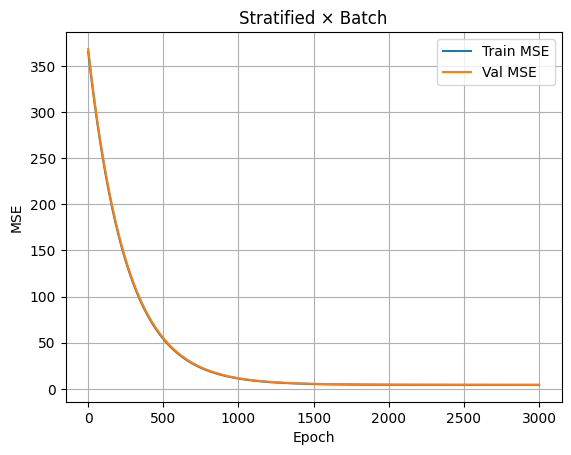

[MB] Epoch    1 | train_mse=296.159360 | val_mse=299.067477
[MB] Epoch  200 | train_mse=4.189341 | val_mse=4.380086
[MB] Epoch  400 | train_mse=4.189307 | val_mse=4.379810
[MB] Epoch  600 | train_mse=4.189308 | val_mse=4.379742
[MB] Epoch  800 | train_mse=4.189337 | val_mse=4.379881
[MB] Epoch 1000 | train_mse=4.189325 | val_mse=4.379094
[MB] Epoch 1200 | train_mse=4.189336 | val_mse=4.380787
[MB] Epoch 1400 | train_mse=4.189315 | val_mse=4.380110
[MB] Epoch 1600 | train_mse=4.189328 | val_mse=4.379083
[MB] Epoch 1800 | train_mse=4.189324 | val_mse=4.380218
[MB] Epoch 2000 | train_mse=4.189320 | val_mse=4.379555
[MB] Epoch 2200 | train_mse=4.189372 | val_mse=4.379017
[MB] Epoch 2400 | train_mse=4.189316 | val_mse=4.379662
[MB] Epoch 2600 | train_mse=4.189325 | val_mse=4.379847
[MB] Epoch 2800 | train_mse=4.189311 | val_mse=4.380318
[MB] Epoch 3000 | train_mse=4.189324 | val_mse=4.381052

=== Stratified | MINIBATCH (sin bias en X) ===
Train  MSE: 4.189324 | R2: 0.988570
Val    MSE: 4.38

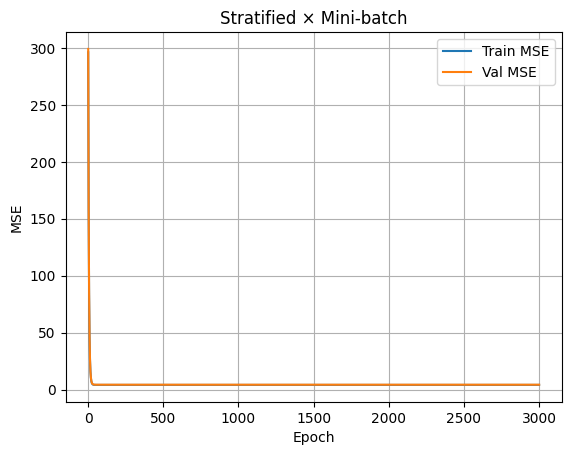

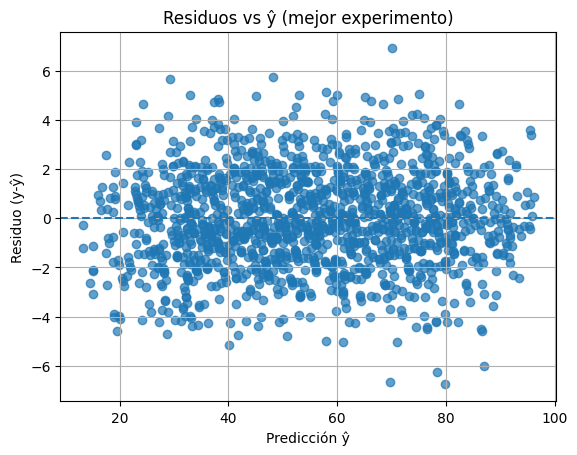

In [ ]:
# ================= REGRESIÓN LINEAL (y = Xw + b) =================

# ---------------- Métricas ----------------
def mse(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).reshape(-1)
    y_pred = np.asarray(y_pred, dtype=float).reshape(-1)
    return float(np.mean((y_pred - y_true)**2))

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).reshape(-1)
    y_pred = np.asarray(y_pred, dtype=float).reshape(-1)
    ss_res = float(np.sum((y_true - y_pred)**2))
    ss_tot = float(np.sum((y_true - np.mean(y_true))**2))
    return float(1 - ss_res/ss_tot) if ss_tot > 0 else np.nan

# ---------------- Escalado (solo features) ----------------
def fit_standardizer(X_df):
    mu = X_df.mean(axis=0)
    sigma = X_df.std(axis=0).replace(0, 1.0)
    return mu, sigma

def apply_standardizer(X_df, mu, sigma):
    return (X_df - mu) / sigma

def scale_splits(Xtr_df, Xva_df, Xte_df):
    mu, sigma = fit_standardizer(Xtr_df)
    return (apply_standardizer(Xtr_df, mu, sigma),
            apply_standardizer(Xva_df, mu, sigma),
            apply_standardizer(Xte_df, mu, sigma))

# ---------------- Utilidades np ----------------
def to_np_no_bias(X_df, y_s):
    X = np.asarray(X_df.values, dtype=float)                  # (m,d)
    y = np.asarray(y_s.values if hasattr(y_s,"values") else y_s, dtype=float).reshape(-1,1)  # (m,1)
    return X, y

# ---------------- Modelo y gradiente ----------------
def predict_wb(X, w, b):
    return X @ w + b  # (m,d)@(d,1) + escalar -> (m,1)

# ∇_w L = (2/m) X^T (Xw + b - y)   ;   ∂L/∂b = (2/m) sum_i (Xw + b - y)
def gradients_wb(X, y, w, b):
    m = X.shape[0]
    resid = (X @ w + b) - y
    grad_w = (2.0/m) * (X.T @ resid)            # (d,1)
    grad_b = float((2.0/m) * np.sum(resid))     # escalar
    return grad_w, grad_b

# ---------------- Entrenamiento: Batch GD ----------------
def fit_batch_gd_wb(X, y, X_val=None, y_val=None, lr=1e-3, epochs=3000, tol=1e-9, verbose_every=200):
    m, d = X.shape
    w = np.zeros((d,1))
    b = float(np.mean(y))   # inicio estable para el intercepto
    hist = {"train_mse": [], "val_mse": []}
    prev = np.inf
    for ep in range(1, epochs+1):
        gw, gb = gradients_wb(X, y, w, b)
        w -= lr * gw
        b -= lr * gb

        yhat_tr = predict_wb(X, w, b)
        loss_tr = mse(y, yhat_tr); hist["train_mse"].append(loss_tr)

        if X_val is not None and y_val is not None:
            yhat_va = predict_wb(X_val, w, b)
            loss_va = mse(y_val, yhat_va); hist["val_mse"].append(loss_va)

        if abs(prev - loss_tr) < tol:
            if verbose_every: print(f"[Early stop] epoch={ep}, train_mse={loss_tr:.6f}")
            break
        prev = loss_tr

        if verbose_every and (ep % verbose_every == 0 or ep == 1):
            msg = f"Epoch {ep:4d} | train_mse={loss_tr:.6f}"
            if X_val is not None and y_val is not None:
                msg += f" | val_mse={hist['val_mse'][-1]:.6f}"
            print(msg)
    return (w, b), hist

# ---------------- Entrenamiento: Mini-batch GD ----------------
def iterate_minibatches_np(X, y, batch_size, rng):
    m = X.shape[0]; idx = rng.permutation(m)
    for s in range(0, m, batch_size):
        e = min(s+batch_size, m)
        sel = idx[s:e]
        yield X[sel], y[sel]

def fit_minibatch_gd_wb(X, y, X_val=None, y_val=None, lr=5e-4, epochs=3000, batch_size=64, tol=1e-8, seed=42, verbose_every=200):
    rng = np.random.default_rng(seed)
    m, d = X.shape
    w = np.zeros((d,1))
    b = float(np.mean(y))
    hist = {"train_mse": [], "val_mse": []}
    prev_val = np.inf
    for ep in range(1, epochs+1):
        for Xb, yb in iterate_minibatches_np(X, y, batch_size, rng):
            gw, gb = gradients_wb(Xb, yb, w, b)
            w -= lr * gw
            b -= lr * gb

        loss_tr = mse(y, predict_wb(X, w, b)); hist["train_mse"].append(loss_tr)
        if X_val is not None and y_val is not None:
            loss_va = mse(y_val, predict_wb(X_val, w, b)); hist["val_mse"].append(loss_va)

        if verbose_every and (ep % verbose_every == 0 or ep == 1):
            if X_val is not None and y_val is not None:
                print(f"[MB] Epoch {ep:4d} | train_mse={loss_tr:.6f} | val_mse={loss_va:.6f}")
            else:
                print(f"[MB] Epoch {ep:4d} | train_mse={loss_tr:.6f}")

        if X_val is not None and y_val is not None:
            if abs(prev_val - hist["val_mse"][-1]) < tol:
                print(f"[MB Early stop] epoch={ep}, val_mse={hist['val_mse'][-1]:.6f}")
                break
            prev_val = hist["val_mse"][-1]
    return (w, b), hist

# ---------------- Runner común ----------------
def run_one_wb(label, Xtr_df, ytr_s, Xva_df, yva_s, Xte_df, yte_s,
               mode="batch", lr_batch=1e-3, lr_mb=5e-4, epochs=3000, tol=1e-9, batch_size=64, verbose_every=200):
    # 1) Escalar features con estadísticas del TRAIN (sin tocar y)
    Xtr_s, Xva_s, Xte_s = scale_splits(Xtr_df, Xva_df, Xte_df)

    # 2) A NumPy
    Xtr, ytr = to_np_no_bias(Xtr_s, ytr_s)
    Xva, yva = to_np_no_bias(Xva_s, yva_s)
    Xte, yte = to_np_no_bias(Xte_s, yte_s)

    # 3) Entrenar
    if mode == "batch":
        (w, b), hist = fit_batch_gd_wb(Xtr, ytr, X_val=Xva, y_val=yva, lr=lr_batch, epochs=epochs, tol=tol, verbose_every=verbose_every)
    else:
        (w, b), hist = fit_minibatch_gd_wb(Xtr, ytr, X_val=Xva, y_val=yva, lr=lr_mb, epochs=epochs, batch_size=batch_size, tol=tol, verbose_every=verbose_every)

    # 4) Métricas
    yhat_tr = predict_wb(Xtr, w, b)
    yhat_va = predict_wb(Xva, w, b)
    yhat_te = predict_wb(Xte, w, b)
    print(f"\n=== {label} | {mode.upper()} (sin bias en X) ===")
    print(f"Train  MSE: {mse(ytr, yhat_tr):.6f} | R2: {r2_score(ytr, yhat_tr):.6f}")
    print(f"Val    MSE: {mse(yva, yhat_va):.6f}   | R2: {r2_score(yva, yhat_va):.6f}")
    print(f"Test   MSE: {mse(yte, yhat_te):.6f}  | R2: {r2_score(yte, yhat_te):.6f}")

    # 5) Reporte de parámetros (b separado, w por feature en el orden de columnas)
    print("\nIntercepto (b):", f"{b: .6f}")
    print("Pesos w por feature:")
    for name, val in zip(list(Xtr_df.columns), w.reshape(-1)):
        print(f"{name:35s} = {val: .6f}")

    return {"history": hist, "w": w, "b": b, "yte": yte, "yhat_te": yhat_te}

# ---------------- Gráficas ----------------
def plot_losses(hist, title="MSE por época (train/val)"):
    tr = np.array(hist.get("train_mse", []), dtype=float)
    va = np.array(hist.get("val_mse", []), dtype=float)
    tr = tr[np.isfinite(tr)]; va = va[np.isfinite(va)]
    plt.figure()
    if tr.size: plt.plot(range(1, tr.size+1), tr, label="Train MSE")
    if va.size: plt.plot(range(1, va.size+1), va, label="Val MSE")
    plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title(title); plt.legend(); plt.grid(True); plt.show()

def plot_residuals(y_true, y_pred, title="Residuos vs ŷ"):
    y_true = np.asarray(y_true).reshape(-1); y_pred = np.asarray(y_pred).reshape(-1)
    resid = y_true - y_pred
    plt.figure(); plt.scatter(y_pred, resid, alpha=0.7)
    plt.axhline(0, ls="--"); plt.xlabel("Predicción ŷ"); plt.ylabel("Residuo (y-ŷ)")
    plt.title(title); plt.grid(True); plt.show()

# ================= CORRIDAS =================
# Random
res_rb  = run_one_wb("Random",     X_train, y_train, X_val, y_val, X_test, y_test, mode="batch")
plot_losses(res_rb["history"], "Random × Batch")
res_rmb = run_one_wb("Random",     X_train, y_train, X_val, y_val, X_test, y_test, mode="minibatch")
plot_losses(res_rmb["history"], "Random × Mini-batch")

# Estratificado
res_sb  = run_one_wb("Stratified", X_train_stratified, y_train_stratified, X_val_stratified, y_val_stratified, X_test_stratified, y_test_stratified, mode="batch")
plot_losses(res_sb["history"], "Stratified × Batch")
res_smb = run_one_wb("Stratified", X_train_stratified, y_train_stratified, X_val_stratified, y_val_stratified, X_test_stratified, y_test_stratified, mode="minibatch")
plot_losses(res_smb["history"], "Stratified × Mini-batch")

# Residuos en TEST del mejor (elige aquí el que mejor val_mse tenga)
best = res_sb  # por ejemplo
plot_residuals(best["yte"], best["yhat_te"], "Residuos vs ŷ (mejor experimento)")


In [21]:
# ================= NUEVAS PREDICCIONES =================
"Originales:"
"[7,99,Yes,9,1,91.0],[4,82,No,4,2,65.0],[8,51,Yes,7,2,45.0]"
w = res_rb["w"]
b = res_rb["b"]

# Definimos el nuevo estudiante
X1_new = pandas.DataFrame([[7,99,1,9,1]], columns=FEATURE_COLS)

# Estandarizamos con mu, sigma de train
mu, sigma = fit_standardizer(X_train)   # cuidado: usa solo TRAIN
X1_new_s = (X1_new - mu) / sigma

# Convertimos a NumPy y predecimos
Xn1, _ = to_np_no_bias(X1_new_s, [0])
yhat_new = predict_wb(Xn1, w, b)
print("Predicción Performance Index 1:", yhat_new[0,0])

X2_new = pandas.DataFrame([[4,82,0,4,2]], columns=FEATURE_COLS)
X2_new_s = (X2_new - mu) / sigma
Xn2, _ = to_np_no_bias(X2_new_s, [0])
yhat_new2 = predict_wb(Xn2, w, b)
print("Predicción Performance Index 2:", yhat_new2[0,0])

X3_new = pandas.DataFrame([[8,51,1,7,2]], columns=FEATURE_COLS)
X3_new_s = (X3_new - mu) / sigma
Xn3, _ = to_np_no_bias(X3_new_s, [0])
yhat_new3 = predict_wb(Xn3, w, b)
print("Predicción Performance Index 3:", yhat_new3[0,0])







Predicción Performance Index 1: 91.77756032306652
Predicción Performance Index 2: 63.109489531052304
Predicción Performance Index 3: 45.07331565943801
